0. Importing Packages

In [342]:
%pip install -q pandas geopandas numpy matplotlib unicode scipy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [422]:
import pandas as pd
import glob
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from unidecode import unidecode
import matplotlib.colors as mcolors

from sklearn.preprocessing import StandardScaler


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

from matplotlib.colors import ListedColormap

import random


# 1. Cleaning data
## 1.1. Importing datasets

In [8]:
# List of files
data_folder = 'Data'
csv_files = glob.glob(f"{data_folder}/*.csv")

# Read each CSV file into a DataFrame and store in a list
dataframes = [pd.read_csv(file) for file in csv_files]

#IICA files
csv_iica = glob.glob(f"{data_folder}/*IICA/*.csv")
dataframes_iica = [pd.read_csv(file) for file in csv_iica]

#Fiscal performance files
csv_fisc = glob.glob(f"{data_folder}/*Terridata/*.csv")
dataframes_fisc = [pd.read_csv(file) for file in csv_fisc]


## 1.2. Cleaning datasets

In [4]:
#####################
### IICA datasets ###
#####################

### IICA 2002-2013 ###
dataframes_iica[0] = dataframes_iica[0].iloc[:, :5]
dataframes_iica[0] = dataframes_iica[0].rename(columns={
    'divipola': 'Divipola',
    'Departamento': 'Depto',
    'Municipio': 'Municipio',
    'año': 'year',
    'Índice de indicencia del conflicto': 'iica'
})

dataframes_iica[0]

,Divipola,Depto,Municipio,year,iica
0,5001,ANTIOQUIA,MEDELLÍN,2013,0.008261
1,5002,ANTIOQUIA,ABEJORRAL,2013,0.005499
2,5004,ANTIOQUIA,ABRIAQUÍ,2013,0.000327
3,5021,ANTIOQUIA,ALEJANDRÍA,2013,0.005062
4,5030,ANTIOQUIA,AMAGÁ,2013,0.016015
...,...,...,...,...,...
13459,97889,VAUPÉS,YAVARATÉ,2002,0.000185
13460,99001,VICHADA,PUERTO CARREÑO,2002,0.021377
13461,99524,VICHADA,LA PRIMAVERA,2002,0.010955
13462,99624,VICHADA,SANTA ROSALÍA,2002,0.012447


In [5]:
#####################
### IICA datasets ###
#####################

### IICA 2014-2016 ###
dataframes_iica[1] = pd.melt(dataframes_iica[1], id_vars=dataframes_iica[1].columns[:3], value_vars=dataframes_iica[1].columns[3:5], 
                    var_name='year', value_name='iica')

# Extract only the year number from the 'year' column
dataframes_iica[1]['year'] = dataframes_iica[1]['year'].str.extract('(\d+)').astype(int)

dataframes_iica[1]



<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cpedr\AppData\Local\Temp\ipykernel_20828\3086565869.py:10: SyntaxWarning: invalid escape sequence '\d'
  dataframes_iica[1]['year'] = dataframes_iica[1]['year'].str.extract('(\d+)').astype(int)


,Divipola,Depto,Municipio,year,iica
0,5001,ANTIOQUIA,MEDELLIN,2014,0.00692
1,5002,ANTIOQUIA,ABEJORRAL,2014,0.00738
2,5004,ANTIOQUIA,ABRIAQUI,2014,0.00070
3,5021,ANTIOQUIA,ALEJANDRIA,2014,0.00056
4,5030,ANTIOQUIA,AMAGA,2014,0.00925
...,...,...,...,...,...
2239,97889,VAUPÉS,YAVARATE,2015,0.00000
2240,99001,VICHADA,PUERTO CARREÑO,2015,0.00620
2241,99524,VICHADA,LA PRIMAVERA,2015,0.01250
2242,99624,VICHADA,SANTA ROSALIA,2015,0.00076


In [22]:
### IICA 2017-2022 ###
dataframes_iica[2] = pd.melt(dataframes_iica[2], id_vars=dataframes_iica[2].columns[1:4], value_vars=dataframes_iica[2].columns[4:10], 
                    var_name='year', value_name='iica')

# Extract only the year number from the 'year' column
dataframes_iica[2]['year'] = dataframes_iica[2]['year'].str.extract('(\d+)').astype(int)

dataframes_iica[2]

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cpedr\AppData\Local\Temp\ipykernel_20828\3795539174.py:6: SyntaxWarning: invalid escape sequence '\d'
  dataframes_iica[2]['year'] = dataframes_iica[2]['year'].str.extract('(\d+)').astype(int)


,Divipola,Municipio,Depto,year,iica
0,5001,MEDELLIN,ANTIOQUIA,2017,0.02816
1,5002,ABEJORRAL,ANTIOQUIA,2017,0.00960
2,5004,ABRIAQUI,ANTIOQUIA,2017,0.03638
3,5021,ALEJANDRIA,ANTIOQUIA,2017,0.03846
4,5030,AMAGA,ANTIOQUIA,2017,0.03954
...,...,...,...,...,...
6721,97889,YAVARATE,VAUPÉS,2022,0.00000
6722,99001,PUERTO CARREÑO,VICHADA,2022,0.06498
6723,99524,LA PRIMAVERA,VICHADA,2022,0.03024
6724,99624,SANTA ROSALIA,VICHADA,2022,0.00344


In [23]:
# Merge all IICA datasets
merged_iica = pd.concat(dataframes_iica, ignore_index=True)

# Display the merged dataframe
merged_iica.dtypes

divipola                                        float64
Departamento                                     object
Municipio                                        object
año                                             float64
Índice de indicencia del conflicto              float64
Índice de indicencia del conflicto categoría     object
Divipola                                        float64
Depto                                            object
IICA 2014                                       float64
IICA 2015                                       float64
IICA 2016                                       float64
IICA 2014 Categoría                              object
IICA 2015 Categoría                              object
IICA 2016 Categoría                              object
year                                            float64
iica                                            float64
dtype: object

In [24]:
##########################
### Fiscal Performance ###
##########################

### New index ###

dataframes_fisc[0] = dataframes_fisc[0][dataframes_fisc[0]['Indicador'] == 'Puntaje nuevo Índice de Desempeño Fiscal']
dataframes_fisc[0]['Dato Numérico'] = dataframes_fisc[0]['Dato Numérico'].str.replace(',', '.').astype(float)
dataframes_fisc[0] = dataframes_fisc[0].iloc[:, [2, 7, 9]]
dataframes_fisc[0] = dataframes_fisc[0].rename(columns={
    'Código Entidad': 'Divipola',
    'Dato Numérico': 'fisc_perf',
    'Año': 'year'
})

dataframes_fisc[0]

,Divipola,fisc_perf,year
22,1001,0.00,2020
23,1001,0.00,2021
48,5000,65.64,2020
49,5000,67.02,2021
74,5001,78.56,2020
...,...,...,...
29455,99524,49.36,2021
29480,99624,44.39,2020
29481,99624,59.72,2021
29506,99773,35.11,2020


In [25]:
### Old Index ###
dataframes_fisc[1] = dataframes_fisc[1][dataframes_fisc[1]['Indicador'] == 'Indicador de desempeño fiscal']
dataframes_fisc[1]['Dato Numérico'] = dataframes_fisc[1]['Dato Numérico'].str.replace(',', '.').astype(float)
dataframes_fisc[1] = dataframes_fisc[1].iloc[:, [2, 7, 9]]
dataframes_fisc[1] = dataframes_fisc[1].rename(columns={
    'Código Entidad': 'Divipola',
    'Dato Numérico': 'fisc_perf',
    'Año': 'year'
})

dataframes_fisc[1]

,Divipola,fisc_perf,year
115,1001.0,NaN,2000.0
116,1001.0,NaN,2001.0
117,1001.0,NaN,2002.0
118,1001.0,NaN,2003.0
119,1001.0,NaN,2004.0
...,...,...,...
166827,99773.0,60.25,2016.0
166828,99773.0,55.16,2017.0
166829,99773.0,NaN,2018.0
166830,99773.0,68.76,2019.0


In [26]:
# Merge all fiscal performance datasets
merged_fisc = pd.concat(dataframes_fisc, ignore_index=True)

# Display the merged dataframe
merged_fisc

,Divipola,fisc_perf,year
0,1001.0,0.00,2020.0
1,1001.0,0.00,2021.0
2,5000.0,65.64,2020.0
3,5000.0,67.02,2021.0
4,5001.0,78.56,2020.0
...,...,...,...
26098,99773.0,60.25,2016.0
26099,99773.0,55.16,2017.0
26100,99773.0,NaN,2018.0
26101,99773.0,68.76,2019.0


In [250]:
###################
### Shape files ###
###################

# Read the shapefile
shapes = gpd.read_file('Data/shapes/shapes.shp')

# Filter the dataset for TIMBIQUI and UBALA
filtered_data = shapes[shapes["nombre_mpi"].isin(["TIMBIQUI", "UBALA"])]

# Sum hectares separately for each municipality
hectares_sum = filtered_data.groupby("nombre_mpi")["hectares"].sum()

def_shapes = shapes.merge(hectares_sum, on="nombre_mpi", how="left")

# Display the updated shapes dataset to verify the hectares variable
shapes = gpd.GeoDataFrame(shapes, geometry="geometry")
shapes

,area,perimeter,dpto,nombre_dpt,mpio,nombre_mpi,nombre_cab,mpios,hectares,geometry
0,1.775410e+09,313036.280961,05,ANTIOQUIA,873,VIGIA DEL FUERTE,VIGIA DEL FUERTE,05873,177540.955,"POLYGON ((-76.90331 6.83561, -76.90562 6.82957..."
1,8.723712e+08,151181.011238,05,ANTIOQUIA,686,SANTA ROSA DE OSOS,SANTA ROSA DE OSOS,05686,87237.121,"POLYGON ((-75.6099 6.8743, -75.6071 6.8708, -7..."
2,1.317151e+09,178275.152241,05,ANTIOQUIA,284,FRONTINO,FRONTINO,05284,131715.082,"POLYGON ((-76.2441 6.9174, -76.2227 6.9167, -7..."
3,8.223566e+07,44796.540606,05,ANTIOQUIA,315,GUADALUPE,GUADALUPE,05315,8223.566,"POLYGON ((-75.2312 6.9374, -75.2232 6.9287, -7..."
4,3.959024e+08,113140.065596,68,SANTANDER,895,ZAPATOCA,ZAPATOCA,68895,39590.242,"POLYGON ((-73.2425 6.9088, -73.2309 6.9047, -7..."
...,...,...,...,...,...,...,...,...,...,...
1117,1.110146e+08,55343.749206,47,MAGDALENA,205,CONCORDIA,CONCORDIA,47205,11101.462,"POLYGON ((-74.69577 10.22744, -74.69933 10.226..."
1118,3.415701e+08,105759.091575,47,MAGDALENA,960,ZAPAYAN,ZAPAYAN,47960,34157.008,"POLYGON ((-74.70518 10.27644, -74.69872 10.263..."
1119,5.837940e+08,151715.069375,17,CALDAS,380,LA DORADA,LA DORADA,17380,58379.399,"POLYGON ((-74.6766 5.7584, -74.6754 5.7463, -7..."
1120,2.816016e+09,359760.445480,27,CHOCO,150,CARMEN DEL DARIEN,CARMEN DEL DARIEN,27150,281601.625,"POLYGON ((-76.89271 7.24821, -76.89113 7.22927..."


In [251]:
###########################
### Working the accents ###
###########################

# Function to remove accents while preserving special cases
def remove_accents(input_string):
    if input_string in ["Ñ", "Ü"]:
        return input_string
    return unidecode(input_string)

deforestation = dataframes[1]
codes = dataframes[2]

# Apply function to remove accents
deforestation["subnational1"] = deforestation["subnational1"].str.upper().apply(remove_accents)
deforestation["subnational2"] = deforestation["subnational2"].str.upper().apply(remove_accents)

codes = codes.rename(columns={
    'Código Municipio': 'codmpio',
    'Nombre Departamento': 'subnational1',
    'Nombre Municipio': 'subnational2'
})

codes["subnational1"] = codes["subnational1"].apply(remove_accents)
codes["subnational2"] = codes["subnational2"].apply(remove_accents)

# Finding non-matching names: towns
non_matching_towns = set(codes["subnational2"]) - set(deforestation["subnational2"])
print(len(non_matching_towns))  # 88 do not match
print(len(set(codes["subnational2"])) - len(set(deforestation["subnational2"])))
print(non_matching_towns)

# Finding non-matching names: departments
non_matching_departments = set(codes["subnational1"]) - set(deforestation["subnational1"])
print(len(non_matching_departments))  # 2 do not match
print(len(set(codes["subnational1"])) - len(set(deforestation["subnational1"])))
print(non_matching_departments)

# Manually updating values
replace_dict_subnational1 = {
    ("CUNDINAMARCA", "SANTAFE DE BOGOTA"): "BOGOTA, D.C.",
    "SAN ANDRES Y PROVIDENCIA": "ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA"
}

replace_dict_subnational2 = {
    ("ANTIOQUIA", "BOLIVAR"): "CIUDAD BOLIVAR",
    ("ANTIOQUIA", "CAROLINA DEL PRINCIPE"): "CAROLINA",
    "DON MATIAS": "DONMATIAS",
    "LA UNION DE SUCRE": "LA UNION",
    "SAN VICENTE": "SAN VICENTE FERRER",
    "SANTAFE DE BOGOTA": "BOGOTA, D.C.",
    "SAN ESTANISLAO DE KOSTKA": "SAN ESTANISLAO",
    ("BOYACA", "CIENAGA"): "CIENEGA",
    "GUICAN": "GÜICAN",
    "TOGUI": "TOGÜI",
    ("CESAR", "MANAURE"): "MANAURE BALCON DEL CESAR",
    "SANTA CRUZ DE LORICA": "LORICA",
    "PURISIMA": "PURISIMA DE LA CONCEPCION",
    "SAN BERNARDINO DE SAHAGUN": "SAHAGUN",
    "SAN JUAN DE RIO SECO": "SAN JUAN DE RIOSECO",
    "SANTA MARTA (DIST. ESP.)": "SANTA MARTA",
    "PUEBLO VIEJO": "PUEBLOVIEJO",
    "LA URIBE": "URIBE",
    "VISTA HERMOSA": "VISTAHERMOSA",
    "SAN JUAN DE PASTO": "PASTO",
    "SANTA CRUZ": "SANTACRUZ",
    "TUMACO": "SAN ANDRES DE TUMACO",
    "SAN JOSE DE CUCUTA": "CUCUTA",
    "LA PLAYA DE BELEN": "LA PLAYA",
    "SALAZAR DE LAS PALMAS": "SALAZAR",
    "SANTO DOMINGO DE SILOS": "SILOS",
    "SAN ANTONIO DE PALMITO": "PALMITO",
    "SINCE": "SAN LUIS DE SINCE",
    "TOLU": "SANTIAGO DE TOLU",
    "TOLUVIEJO": "TOLU VIEJO",
    "ARMERO": "ARMERO GUAYABAL",
    "SANTIAGO DE CALI": "CALI",
    "SAN MIGUEL DE MOCOA": "MOCOA",
    "MIRITI-PARANA": "MIRITI - PARANA",
    "PUERTO INIRIDA": "INIRIDA",
    "PAPUNAHUA": "PAPUNAUA"
}

deforestation["subnational1"] = deforestation.apply(
    lambda row: replace_dict_subnational1.get((row["subnational1"], row["subnational2"]), 
                                              replace_dict_subnational1.get(row["subnational1"], row["subnational1"])), axis=1
)

deforestation["subnational2"] = deforestation.apply(
    lambda row: replace_dict_subnational2.get((row["subnational1"], row["subnational2"]), 
                                              replace_dict_subnational2.get(row["subnational2"], row["subnational2"])), axis=1
)

# Merge datasets
def_codes = pd.merge(deforestation, codes, on=["subnational1", "subnational2"])

def_codes


52
49
{'HATONUEVO', 'TUCHIN', 'EL RETEN', 'NORCASIA', 'MAPIRIPANA', 'PUERTO ARICA', 'MEDIO SAN JUAN', 'LA APARTADA', 'ARENAL', 'SANTA BARBARA DE PINTO', 'SITIONUEVO', 'SOLITA', 'MEDIO ATRATO', 'DIBULLA', 'LA PINTADA', 'SAN CRISTOBAL', 'CLEMENCIA', 'SAN JACINTO DEL CAUCA', 'PIAMONTE', 'SAN JOSE', 'EL ROSAL', 'EL PENOL', 'RIO QUITO', 'DISTRACCION', 'SAN JOSE DE URE', 'CERTEGUI', 'MEDIO BAUDO', 'ZAPAYAN', 'MAGANGUE', 'ZONA BANANERA', 'PIJINO DEL CARMEN', 'COTORRA', 'RIO IRO', 'PUERTO ALEGRIA', 'PALOCABILDO', 'TIQUISIO', 'MORICHAL', 'ATRATO', 'GUACHENE', 'SABANAS DE SAN ANGEL', 'UNION PANAMERICANA', 'ALGARROBO', 'CARMEN DEL DARIEN', 'NUEVA GRANADA', 'REGIDOR', 'ARROYOHONDO', 'PUEBLO BELLO', 'VILLA RICA', 'NOROSI', 'COVENAS', 'EL ROBLE', 'LA JAGUA DEL PILAR'}
0
0
set()


,country,subnational1,subnational2,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,...,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,Código Departamento,codmpio,Código Centro Poblado,Nombre Centro Poblado
0,Colombia,AMAZONAS,EL ENCANTO,0,1027642,1027642,1027642,773,212,182,...,178,219,392,299,334,224,91,91263,91263000,EL ENCANTO
1,Colombia,AMAZONAS,EL ENCANTO,10,1027642,1010468,1010236,773,212,182,...,176,218,386,295,320,217,91,91263,91263000,EL ENCANTO
2,Colombia,AMAZONAS,EL ENCANTO,15,1027642,1010422,1010189,773,212,182,...,176,218,386,295,320,217,91,91263,91263000,EL ENCANTO
3,Colombia,AMAZONAS,EL ENCANTO,20,1027642,1010269,1010088,773,212,182,...,176,217,386,295,319,217,91,91263,91263000,EL ENCANTO
4,Colombia,AMAZONAS,EL ENCANTO,25,1027642,1010200,1010045,773,212,182,...,176,217,386,294,319,217,91,91263,91263000,EL ENCANTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69915,Colombia,VICHADA,SANTA ROSALIA,30,432087,41681,43871,6493,75,120,...,28,27,43,78,31,36,99,99624,99624001,GUACACÍAS
69916,Colombia,VICHADA,SANTA ROSALIA,50,432087,36801,36327,6493,66,110,...,25,27,42,77,29,31,99,99624,99624000,SANTA ROSALÍA
69917,Colombia,VICHADA,SANTA ROSALIA,50,432087,36801,36327,6493,66,110,...,25,27,42,77,29,31,99,99624,99624001,GUACACÍAS
69918,Colombia,VICHADA,SANTA ROSALIA,75,432087,30129,28283,6493,53,99,...,23,24,38,67,24,25,99,99624,99624000,SANTA ROSALÍA


In [252]:
#####################
### Deforestation ###
#####################

# Select only numeric columns
numeric_cols = def_codes.select_dtypes(include=[np.number]).columns

# Group by 'subnational1' and 'subnational2' and calculate the mean for tree cover loss for all thresholds
def_codes = def_codes.groupby(['subnational1', 'subnational2'])[numeric_cols].mean()
def_codes.reset_index(inplace=True)
def_codes = def_codes.iloc[:, list(range(0, 2)) + list(range(7, def_codes.shape[1]))]

# Wide to long
def_codes = pd.melt(def_codes, id_vars=list(def_codes.columns[[0, 1, 26]]), value_vars=def_codes.columns[2:25], 
                    var_name='year', value_name='tc_loss')

# Extract only the year number from the 'year' column
def_codes['year'] = def_codes['year'].str.extract('(\d+)')
# Drop rows with NaN values in the 'year' column
def_codes = def_codes.dropna(subset=['year'])

# Convert the 'year' column to integers
def_codes['year'] = def_codes['year'].astype(int)


def_codes


<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cpedr\AppData\Local\Temp\ipykernel_33088\154202201.py:18: SyntaxWarning: invalid escape sequence '\d'
  def_codes['year'] = def_codes['year'].str.extract('(\d+)')


,subnational1,subnational2,codmpio,year,tc_loss
0,AMAZONAS,EL ENCANTO,91263.0,2001,212.000
1,AMAZONAS,LA CHORRERA,91405.0,2001,285.000
2,AMAZONAS,LA PEDRERA,91407.0,2001,139.000
3,AMAZONAS,LETICIA,91001.0,2001,180.750
4,AMAZONAS,MIRITI - PARANA,91460.0,2001,125.000
...,...,...,...,...,...
24352,VAUPES,YAVARATE,97889.0,2023,229.000
24353,VICHADA,CUMARIBO,99773.0,2023,1401.125
24354,VICHADA,LA PRIMAVERA,99524.0,2023,338.125
24355,VICHADA,PUERTO CARRENO,99001.0,2023,199.500


In [253]:
# Merge the shapes dataset with the deforestation dataset on the common columns

shapes['mpios'] = shapes['mpios'].astype(int)


def_shapes = def_codes.merge(shapes, left_on=['codmpio'], right_on=['mpios'])

# Display the merged dataframe
def_shapes

,subnational1,subnational2,codmpio,year,tc_loss,area,perimeter,dpto,nombre_dpt,mpio,nombre_mpi,nombre_cab,mpios,hectares,geometry
0,AMAZONAS,EL ENCANTO,91263.0,2001,212.000,8.929184e+09,6.299199e+05,91,AMAZONAS,263,EL ENCANTO,EL ENCANTO,91263,892918.382,"POLYGON ((-73.51335 -1.56815, -73.18436 -1.571..."
1,AMAZONAS,LA CHORRERA,91405.0,2001,285.000,1.318208e+10,7.218203e+05,91,AMAZONAS,405,LA CHORRERA,LA CHORRERA,91405,1318207.855,"POLYGON ((-73.88365 -0.43056, -73.8764 -0.4284..."
2,AMAZONAS,LA PEDRERA,91407.0,2001,139.000,1.499952e+10,7.837434e+05,91,AMAZONAS,407,LA PEDRERA,LA PEDRERA,91407,1499952.382,"POLYGON ((-70.49721 -0.43223, -70.4892 -0.442,..."
3,AMAZONAS,LETICIA,91001.0,2001,180.750,5.202157e+09,3.342930e+05,91,AMAZONAS,001,LETICIA,LETICIA,91001,520215.658,"POLYGON ((-70.32233 -3.19907, -70.29477 -3.203..."
4,AMAZONAS,MIRITI - PARANA,91460.0,2001,125.000,1.627019e+10,6.165239e+05,91,AMAZONAS,460,MIRITI-PARANA,MIRITI-PARANA,91460,1627019.153,"POLYGON ((-71.61613 -0.02047, -71.60981 -0.045..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24398,VAUPES,YAVARATE,97889.0,2023,229.000,4.747585e+09,3.493606e+05,97,VAUPES,889,YAVARATE,YAVARATE,97889,474758.541,"POLYGON ((-70.0458 0.4931, -70.0764 0.5677, -7..."
24399,VICHADA,CUMARIBO,99773.0,2023,1401.125,6.578661e+10,1.589733e+06,99,VICHADA,773,CUMARIBO,CUMARIBO,99773,6578660.918,"POLYGON ((-68.5412 5.437, -68.5118 5.4467, -68..."
24400,VICHADA,LA PRIMAVERA,99524.0,2023,338.125,2.038062e+10,6.783370e+05,99,VICHADA,524,LA PRIMAVERA,LA PRIMAVERA,99524,2038062.144,"POLYGON ((-68.556 6.1065, -68.5412 5.437, -68...."
24401,VICHADA,PUERTO CARRENO,99001.0,2023,199.500,9.552698e+09,4.103455e+05,99,VICHADA,001,PUERTO CARREÃO,PUERTO CARREÃO,99001,955269.758,"POLYGON ((-68.556 6.1065, -68.5203 6.1254, -68..."


# 2. First Graphs

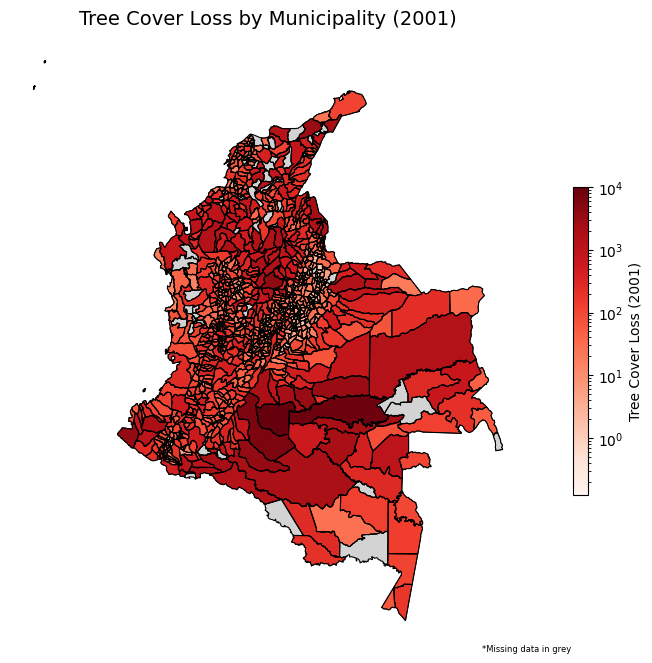

In [ ]:
#Example for 2001 -----> SOLO PARA PRUEBAS

# Plot the tree cover loss for 2001
tree_loss_2001 = def_shapes[def_shapes["year"] == 2001][["codmpio", "tc_loss", "geometry"]]
tree_loss_2001 = gpd.GeoDataFrame(tree_loss_2001, geometry="geometry")

# Replace 0 with NA to avoid log(0) in the color mapping
tree_loss_2001["tc_loss"] = tree_loss_2001["tc_loss"].replace(0, np.nan)  # Replace 0 with NA
# Define log scale normalization for color mapping
log_norm = mcolors.LogNorm(vmin=tree_loss_2001["tc_loss"].min(), vmax=tree_loss_2001["tc_loss"].max())

fig, ax = plt.subplots(figsize=(12, 8))

shapes.plot(ax=ax, linewidth=0.8, color="lightgrey")  # Outline for all municipalities
shapes.boundary.plot(ax=ax, linewidth=0.8, color="black")

tree_loss_2001.plot(column="tc_loss", cmap="Reds", linewidth=0.5, edgecolor="black",
         legend=True, ax=ax, norm=log_norm,
         missing_kwds={"color": "lightgrey", "label": "No Data"},
         legend_kwds={"label": "Tree Cover Loss (2001)", "orientation": "vertical", "shrink": 0.5})  # Shrink legend size


ax.set_title("Tree Cover Loss by Municipality (2001)", fontsize=14)
ax.axis("off")  # Hide axes

# Move legend to the bottom right corner
leg = ax.get_legend()
if leg:
    leg.set_bbox_to_anchor((0.95, 0.05))  # (X, Y) position in figure coordinates

# Add footnote about missing data
plt.annotate("*Missing data in grey", xy=(1, 0), xycoords="axes fraction",
             fontsize=6, ha="center", va="center", color="black")

plt.show()

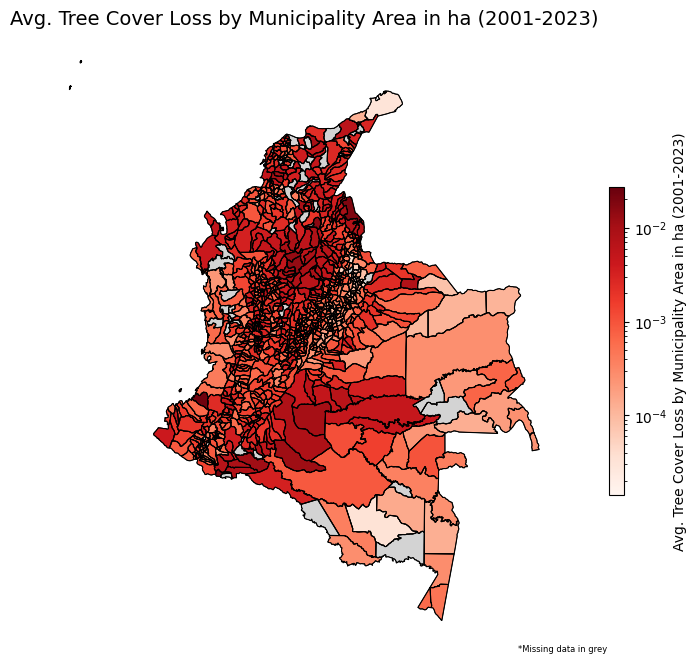

In [ ]:
###############################
### Aggregate Deforestation ###
###############################

# Transform Deforestation Data into Wide Format
# Ensure there are no duplicate entries for the pivot
def_shapes['tc_loss_area'] = def_shapes['tc_loss'] / def_shapes['hectares']

# Aggregate Tree Cover Loss by Municipality
avg_tc_loss = def_shapes.groupby("mpios")["tc_loss_area"].mean().reset_index()

# Merge Data and Ensure Geometry is Valid
gdf = shapes.merge(avg_tc_loss, on="mpios", how="left")

# Ensure `gdf` is a GeoDataFrame
gdf = gpd.GeoDataFrame(gdf, geometry="geometry")

# Drop rows where geometry is missing or invalid
gdf = gdf.dropna(subset=["geometry"])
gdf = gdf[gdf.is_valid]  # Remove invalid geometries


# Replace 0 with NA to avoid log(0) in the color mapping
gdf["tc_loss_area"] = gdf["tc_loss_area"].replace(0, np.nan)  # Replace 0 with NA
# Define log scale normalization for color mapping
log_norm = mcolors.LogNorm(vmin=gdf["tc_loss_area"].min(), vmax=gdf["tc_loss_area"].max())

fig, ax = plt.subplots(figsize=(12, 8))

shapes.plot(ax=ax, linewidth=0.8, color="lightgrey")  # Outline for all municipalities
shapes.boundary.plot(ax=ax, linewidth=0.8, color="black")

gdf.plot(column="tc_loss_area", cmap="Reds", linewidth=0.5, edgecolor="black",
         legend=True, ax=ax, norm=log_norm,
         missing_kwds={"color": "lightgrey", "label": "No Data"},
         legend_kwds={"label": "Avg. Tree Cover Loss by Municipality Area in ha (2001-2023)", "orientation": "vertical", "shrink": 0.5})  # Shrink legend size


ax.set_title("Avg. Tree Cover Loss by Municipality Area in ha (2001-2023)", fontsize=14)
ax.axis("off")  # Hide axes

# Move legend to the bottom right corner
leg = ax.get_legend()
if leg:
    leg.set_bbox_to_anchor((0.95, 0.05))  # (X, Y) position in figure coordinates

# Add footnote about missing data
plt.annotate("*Missing data in grey", xy=(1, 0), xycoords="axes fraction",
             fontsize=6, ha="center", va="center", color="black")

plt.show()

C:\Users\cpedr\AppData\Local\Temp\ipykernel_33088\1087583339.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf.geometry.centroid
C:\Users\cpedr\AppData\Local\Temp\ipykernel_33088\1087583339.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["x"] = gdf.centroid.x
C:\Users\cpedr\AppData\Local\Temp\ipykernel_33088\1087583339.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["y"] = gdf.centroid.y
c:\Users\cpedr\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wind

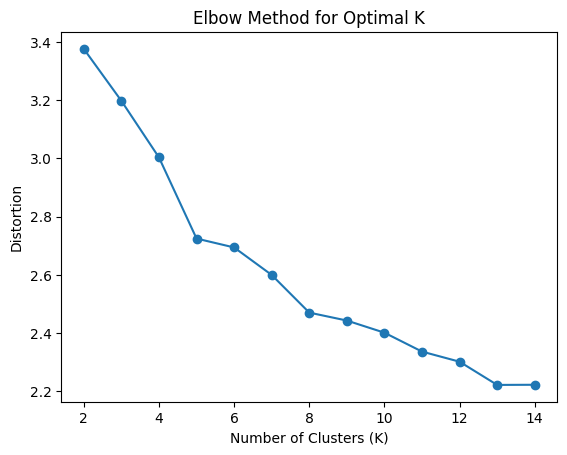

c:\Users\cpedr\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\cpedr\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\cpedr\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\cpedr\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

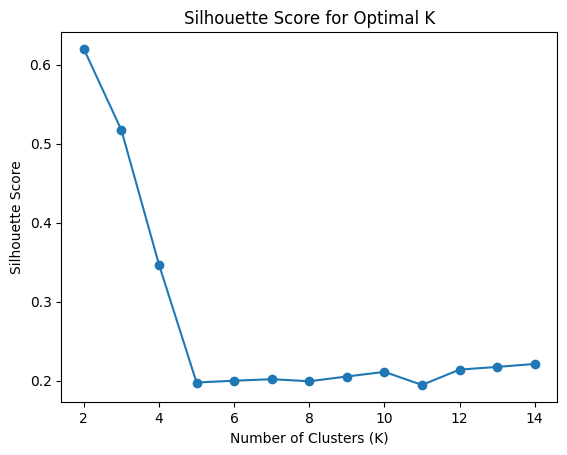

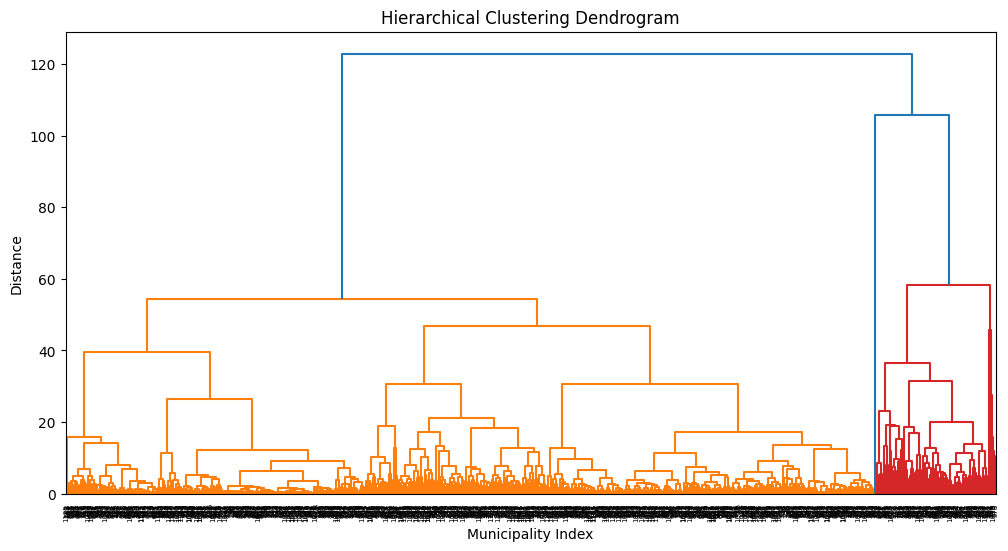

In [ ]:
##################
### Clustering ### --------------> ESTE ES EL QUE NO FUNCIONA TAN BIEN
##################

# Pivot the data so each row is a municipality and each column is a year
deforestation_wide = def_shapes.pivot(index=["mpios", 'geometry'], columns="year", values="tc_loss_area").fillna(0)
deforestation_wide = deforestation_wide.apply(lambda x: x.fillna(x.median()), axis=0)  # Option 2: Fill with median per year

# Merge with the municipality geometries
gdf = shapes.merge(deforestation_wide, on="mpios", how="left")

# Ensure No NaNs Before K-Means
gdf.iloc[:, gdf.columns.get_loc(deforestation_wide.columns[0]):] = gdf.iloc[:, gdf.columns.get_loc(deforestation_wide.columns[0]):].fillna(0)
# Convert to GeoDataFrame (Ensure it's recognized as a GeoDataFrame)
gdf = gpd.GeoDataFrame(gdf, geometry="geometry")

# Extract Centroids
gdf["centroid"] = gdf.geometry.centroid
gdf["x"] = gdf.centroid.x
gdf["y"] = gdf.centroid.y

# Select Only Deforestation-Related Numeric Columns
# Find the starting index of deforestation data
start_col_idx = gdf.columns.get_loc(deforestation_wide.columns[0])

# Select only numerical columns (excluding 'geometry' and any non-numeric data)
deforestation_features = gdf.iloc[:, start_col_idx:].select_dtypes(include=[np.number]).values

# Normalize Spatial and Deforestation Data Separately
scaler = StandardScaler()
normalized_spatial = scaler.fit_transform(gdf[["x", "y"]])  # Normalize coordinates
normalized_deforestation = scaler.fit_transform(deforestation_features)  # Normalize deforestation trends

# Combine Spatial and Deforestation Features
normalized_features = np.hstack((normalized_spatial, normalized_deforestation))

# Find Optimal K Using the Elbow Method
distortions = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(normalized_features)
    distortions.append(sum(np.min(cdist(normalized_features, kmeans.cluster_centers_, 'euclidean'), axis=1)) / normalized_features.shape[0])

# Plot the Elbow Curve
plt.plot(K_range, distortions, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Distortion")
plt.title("Elbow Method for Optimal K")
plt.show()

from sklearn.metrics import silhouette_score
# Store silhouette scores
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(normalized_features)
    silhouette_scores.append(silhouette_score(normalized_features, labels))

# Plot Silhouette Score
import matplotlib.pyplot as plt

plt.plot(K_range, silhouette_scores, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()


from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch

# Compute the linkage matrix
linkage_matrix = linkage(normalized_features, method="ward")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Municipality Index")
plt.ylabel("Distance")
plt.show()

# Apply K-Means Clustering (Choose the best K)
optimal_k = 6  # Adjust based on elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
gdf["cluster_kmeans"] = kmeans.fit_predict(normalized_features)

# Assign a Special Cluster for Municipalities Without Data
gdf.loc[gdf[deforestation_wide.columns].sum(axis=1) == 0, "cluster_kmeans"] = -1  # Special cluster for no data
# Get unique clusters, ensuring -1 is included
unique_clusters = sorted(gdf["cluster_kmeans"].unique())
if -1 not in unique_clusters:
    unique_clusters = [-1] + unique_clusters  # Ensure -1 is first

# Define a color mapping where -1 is grey, others use a default colormap
colors = ['lightgrey'] + plt.cm.tab10(np.linspace(0, 1, len(unique_clusters) - 1)).tolist()  # Assign grey to -1

# Create a colormap from the list
cmap = ListedColormap(colors)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column="cluster_kmeans", cmap=cmap, linewidth=0.5, edgecolor="black", legend=False, ax=ax)

# Manually create a legend to ensure "No Data" is labeled correctly
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=colors[i], label="No Data" if unique_clusters[i] == -1 else f"Cluster {unique_clusters[i]}")
           for i in range(len(unique_clusters))]

ax.legend(handles, [h.get_label() for h in handles], title="Cluster Regions", loc="lower left",
          fontsize=10, title_fontsize=12, frameon=True,
          bbox_to_anchor=(0.02, -0.01))

# Set title
ax.set_title("K-Means Clustering of Municipalities based on spatial \ndistribution and deforestation trends between 2001 and 2023", fontsize=14)

# Remove axis borders
ax.axis("off")

plt.show()

C:\Users\cpedr\AppData\Local\Temp\ipykernel_33088\3611174824.py:35: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf.geometry.centroid
C:\Users\cpedr\AppData\Local\Temp\ipykernel_33088\3611174824.py:36: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["x"] = gdf.centroid.x
C:\Users\cpedr\AppData\Local\Temp\ipykernel_33088\3611174824.py:37: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["y"] = gdf.centroid.y
c:\Users\cpedr\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wind

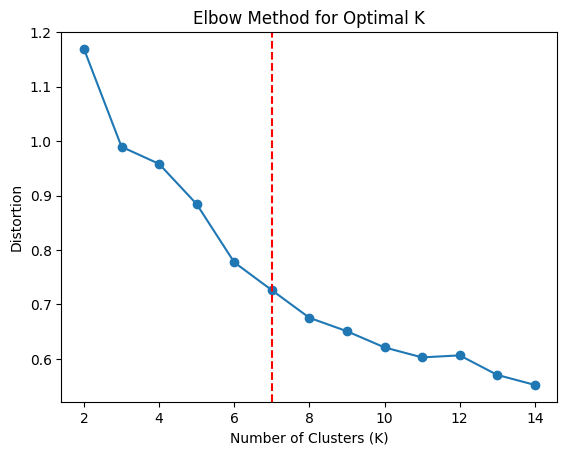

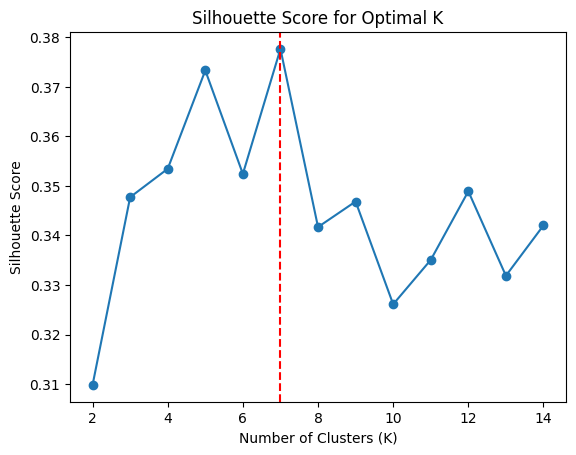

C:\Users\cpedr\AppData\Local\Temp\ipykernel_33088\3611174824.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


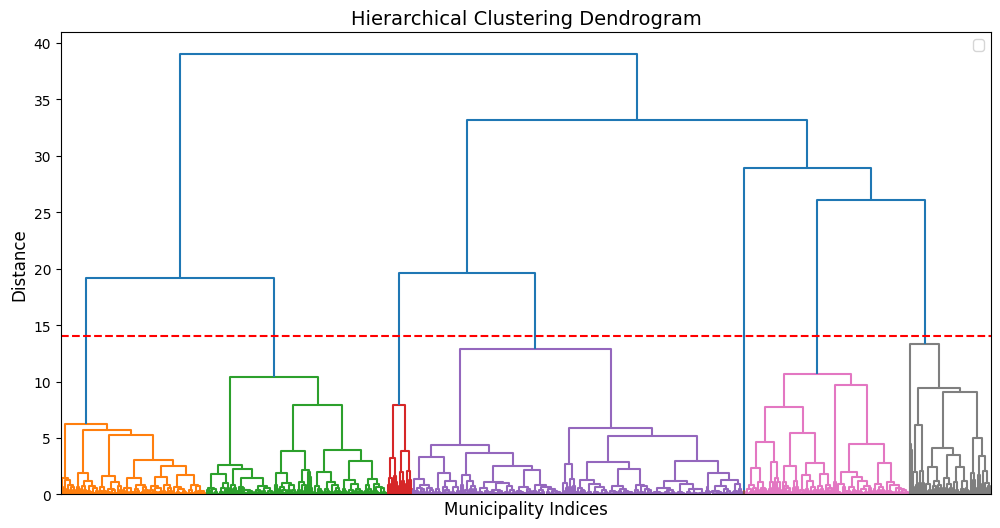

In [ ]:
##################
### Clustering ### --------------> ESTE FUNCIONA MEJOR
##################

# Pivot the data so each row is a municipality and each column is a year
deforestation_wide = def_shapes.pivot(index=["mpios", 'geometry'], columns="year", values="tc_loss_area").fillna(0)

# Compute the average deforestation per municipality across all years
deforestation_wide["avg_deforestation"] = deforestation_wide.mean(axis=1)

# Select only the relevant columns (municipality, geometry, avg_deforestation)
deforestation_avg = deforestation_wide[["avg_deforestation"]].reset_index()

# Merge with the municipality geometries
gdf = shapes.merge(deforestation_avg, on="mpios", how="left")

# Ensure No NaNs Before Clustering
gdf["avg_deforestation"] = gdf["avg_deforestation"].fillna(0)

# Convert to GeoDataFrame (Ensure it's recognized as a GeoDataFrame)
gdf = gpd.GeoDataFrame(gdf, geometry="geometry_x")

# Extract Centroids (Spatial Features)
gdf["centroid"] = gdf.geometry.centroid
gdf["x"] = gdf.centroid.x
gdf["y"] = gdf.centroid.y

# ✅ Select Features for Clustering (Spatial + Avg Deforestation)
features = gdf[["x", "y", "avg_deforestation"]].values

# Normalize Features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

##################
### Find Optimal K ###
##################

distortions = []
silhouette_scores = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(normalized_features)
    
    # Compute Distortion (Elbow Method)
    distortions.append(sum(np.min(cdist(normalized_features, kmeans.cluster_centers_, 'euclidean'), axis=1)) / normalized_features.shape[0])
    
    # Compute Silhouette Score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(normalized_features, labels))

# Plot the Elbow Curve
plt.plot(K_range, distortions, marker="o")
plt.axvline(x=7, color='r', linestyle='--', label="Optimal K = 7")  # Add vertical line
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Distortion")
plt.title("Elbow Method for Optimal K")
plt.show()

# Plot Silhouette Score
plt.plot(K_range, silhouette_scores, marker="o")
plt.axvline(x=7, color='r', linestyle='--', label="Optimal K = 7")  # Add vertical line
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()

##################
### Hierarchical Clustering ###
##################

# Compute the linkage matrix
linkage_matrix = linkage(normalized_features, method="ward")

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(12, 6))
dendrogram(
    linkage_matrix,
    ax=ax,
    no_labels=True,  # Removes individual labels (avoid clutter)
    color_threshold=14  # Colors branches below y=14 differently
)

# Add a horizontal line at y=14 to indicate clustering threshold
ax.axhline(y=14, color='r', linestyle='--')

# Improve x-axis: Reduce clutter by using a subset of indices
ax.set_xticks([])  # Hide x-axis labels since too many municipalities cause clutter

# Titles and labels
ax.set_title("Hierarchical Clustering Dendrogram", fontsize=14)
ax.set_xlabel("Municipality Indices", fontsize=12)
ax.set_ylabel("Distance", fontsize=12)

# Show legend
ax.legend()

plt.show()


c:\Users\cpedr\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


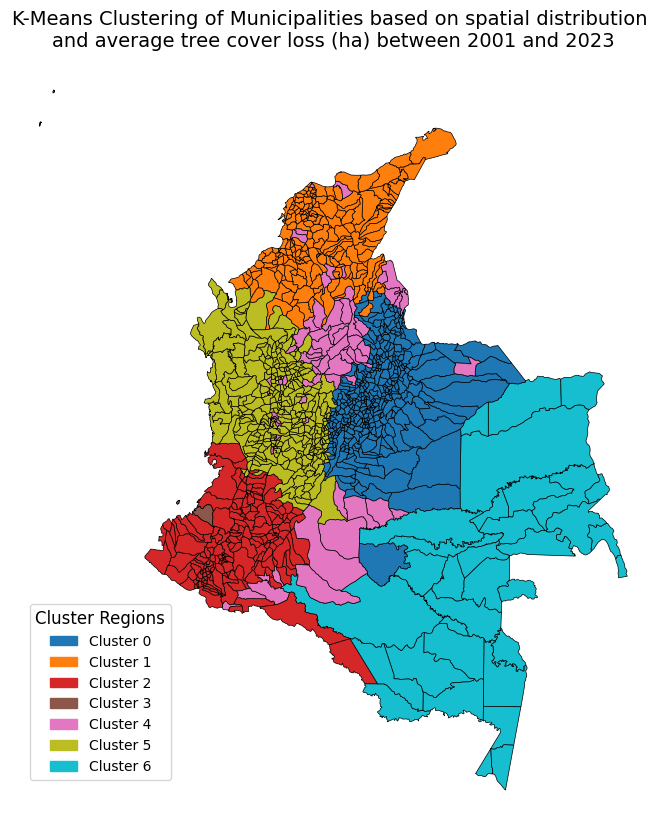

In [339]:
# Apply K-Means Clustering (Choose the best K)
optimal_k = 7   # Adjust based on elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
gdf["cluster_kmeans"] = kmeans.fit_predict(normalized_features)


# Get unique clusters and colors
unique_clusters = sorted(gdf["cluster_kmeans"].unique())  # Ensure clusters are sorted
colors = plt.get_cmap("tab10")(np.linspace(0, 1, len(unique_clusters)))  # Generate colors for clusters

# Create legend handles for clusters
handles = [mpatches.Patch(color=colors[i], label=f"Cluster {unique_clusters[i]}") 
           for i in range(len(unique_clusters))]

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column="cluster_kmeans", cmap="tab10", linewidth=0.5, edgecolor="black", legend=False, ax=ax)

# Add the manually created legend
ax.legend(handles=handles, title="Cluster Regions", loc="lower left",
          fontsize=10, title_fontsize=12, frameon=True,
          bbox_to_anchor=(0.02, 0.05))

# Set title
ax.set_title("K-Means Clustering of Municipalities based on spatial distribution \nand average tree cover loss (ha) between 2001 and 2023", fontsize=14)

# Remove axis borders
ax.axis("off")

plt.show()

In [356]:
##############################
### Merging final datasets ###
##############################

# Merge gdf with def_codes
final_df = gdf.merge(def_codes, left_on="mpios", right_on="codmpio", how="left")

# Keep only relevant columns
final_df = final_df[["subnational1", "subnational2", "cluster_kmeans", "codmpio", "year", "tc_loss"]]
final_df

# Keep relevant columns for dataframes[5]
general = dataframes[5][["codmpio", "ano", "gandina", "gcaribe", "gpacifica", "gorinoquia", "gamazonia",
                         "areaoficialhm2", "discapital", "dismdo", "disbogota"]]

# Merging final_df with general and dataframes[0]
final_df = final_df.merge(general, left_on=["codmpio", "year"], right_on=["codmpio", "ano"], how="left")
final_df = final_df.merge(dataframes[0], left_on=["codmpio", "year"], right_on=["codmpio", "ano"], how="left")

In [358]:
final_df
# Save the final dataframe to a CSV file    
final_df.to_csv("final_df.csv", index=False)

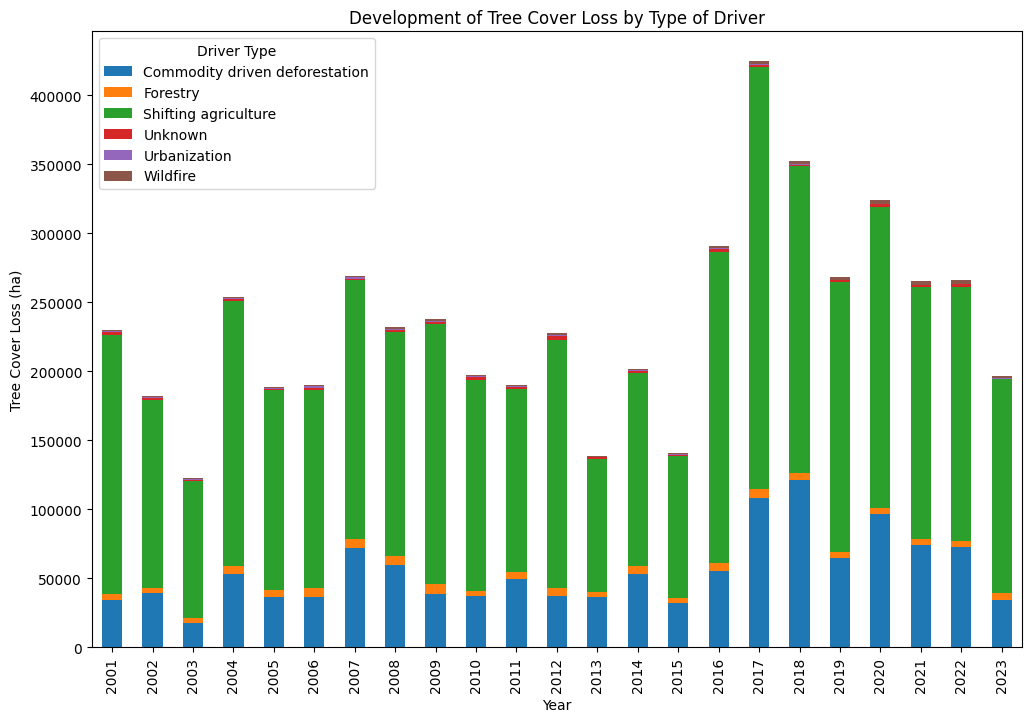

In [331]:
#######################################
### Deforestation by type of driver ###
#######################################

# Deforestation data by type of driver
df_deforestation = dataframes[3]

# Pivot the dataframe to have years as index and types as columns
df_pivot = df_deforestation.pivot(index='umd_tree_cover_loss__year', columns='tsc_tree_cover_loss_drivers__driver', values='umd_tree_cover_loss__ha')

# Plot the bar graph
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Development of Tree Cover Loss by Type of Driver')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (ha)')
plt.legend(title='Driver Type')
plt.show()

In [ ]:
# Calculate the total tree cover loss by year
df_pivot['Total'] = df_pivot.sum(axis=1)

# Calculate the percentage of "Shifting agriculture" for each year
df_pivot['Shifting_agriculture_percentage'] = (df_pivot['Shifting agriculture'] / df_pivot['Total']) * 100

# Calculate the average percentage of "Shifting agriculture"
average_shifting_agriculture_percentage = df_pivot['Shifting_agriculture_percentage'].mean()

print(f"Average percentage of Shifting agriculture: {average_shifting_agriculture_percentage:.2f}%")

Average percentage of Shifting agriculture: 73.50%


In [402]:
########################################
### Maps for departments and regions ###
########################################

# Merging gdf with general
gdf_new = gdf.merge(general, left_on="mpios", right_on="codmpio", how="left")


# Keep only relevant columns
gdf_new = gdf_new[["mpios","nombre_dpt", "nombre_mpi", "cluster_kmeans", "geometry_x", "gandina", "gcaribe", "gpacifica", "gorinoquia", "gamazonia"]]
gdf_new = gpd.GeoDataFrame(gdf_new, geometry="geometry_x") # Ensure it's recognized as a GeoDataFrame

# Keep unique rows
gdf_new = gdf_new.drop_duplicates(subset=["mpios","geometry_x"])

# Transforming for wide to long
gdf_new = gdf_new.melt(id_vars=["mpios", "nombre_dpt", "nombre_mpi", "cluster_kmeans", "geometry_x"], 
                       value_vars=["gandina", "gcaribe", "gpacifica", "gorinoquia", "gamazonia"], 
                       var_name="region", value_name="region_value")

# Exrtract region name
gdf_new["region"] = gdf_new["region"].str.replace("g", "").str.capitalize()

# Get rid of the rows when region_value == 0
gdf_new = gdf_new[gdf_new["region_value"] != 0]


# Fix mistake in the region names for a single municipality
gdf_new.loc[gdf_new["nombre_mpi"] == "BELEN DE BAJIRA", "region"] = "Pacifica"
gdf_new.loc[gdf_new["nombre_mpi"] == "SANTA CATALINA", "region"] = "Caribe"
del gdf_new["region_value"]

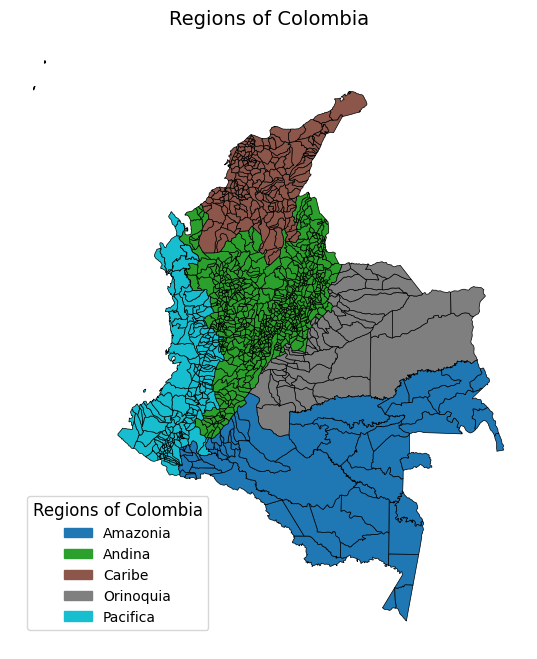

In [ ]:
# Plot the map for regions
fig, ax = plt.subplots(figsize=(12, 8))
gdf_new.plot(column="region", cmap="tab10", linewidth=0.5, edgecolor="black", legend=True, ax=ax)

# Get unique clusters and colors
unique_regions = sorted(gdf_new["region"].unique())  # Ensure regions are sorted
colors = plt.get_cmap("tab10")(np.linspace(0, 1, len(unique_regions)))  # Generate colors for regions

# Create legend handles for regions
handles = [mpatches.Patch(color=colors[i], label=f"{unique_regions[i]}") 
           for i in range(len(unique_regions))]

# Add the manually created legend
ax.legend(handles=handles, title="Regions of Colombia", loc="lower left",
          fontsize=10, title_fontsize=12, frameon=True,
          bbox_to_anchor=(0.02, 0.02))

# Set title
ax.set_title("Regions of Colombia", fontsize=14)

# Remove axis borders
ax.axis("off")

plt.show()

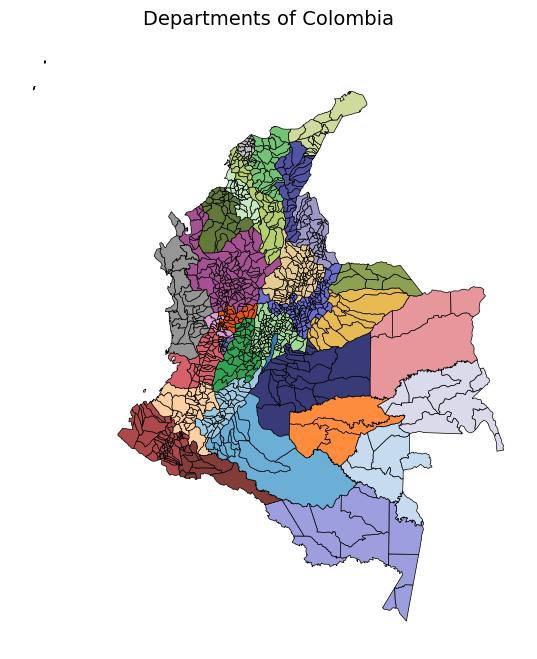

In [ ]:
# Map for departments --------------> DE PRONTO NO CONVIENE POR LA CANTIDAD DE DEPARTAMENTOS

# Set a fixed seed to ensure the same colors are selected every time
random.seed(123)

# Extract 20 colors from 'tab20b' and 'tab20c' (total of 40)
colors_tab20b = [plt.cm.tab20b(i/20) for i in range(20)]
colors_tab20c = [plt.cm.tab20c(i/20) for i in range(20)]

# Combine both color lists
all_colors = colors_tab20b + colors_tab20c  # 40 total colors

# Randomly select 33 unique colors
selected_colors = random.sample(all_colors, 33)

# Convert to a colormap
custom_cmap = ListedColormap(selected_colors)


# Plot the map for regions
fig, ax = plt.subplots(figsize=(12, 8))
gdf_new.plot(column="nombre_dpt", cmap=custom_cmap, linewidth=0.5, edgecolor="black", legend=False, ax=ax)

# Set title
ax.set_title("Departments of Colombia", fontsize=14)

# Remove axis borders
ax.axis("off")

plt.show()